## Convolution Neural Network

What we want the computer to do is to be able to differentiate between all the images it’s given and figure out the unique features that make a dog a dog or that make a cat a cat.

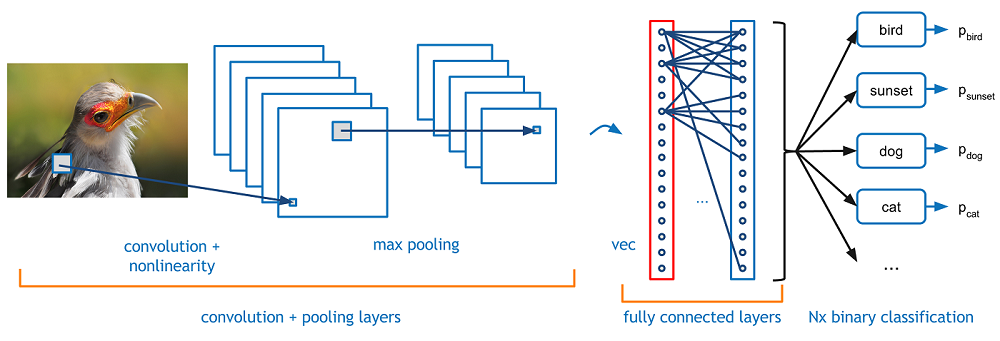

CNN Tutorial
-----------
https://adeshpande3.github.io/A-Beginner%27s-Guide-To-Understanding-Convolutional-Neural-Networks/

## Part1:  Building the CNN

### Importing the libraries

There are 2 ways to initialize the neural network either as Sequential of layers or as a graph

In [ ]:
import tensorflow as tf
import keras 
from keras.layers import Dense ## Add the fully connected layer in ANN

In [ ]:
from keras.models import Sequential

Below package is the first step for making the CNN in which we add convolutional layers.Here we are working on images (spread over 2D) whereas videos spread over time 3D.

In [22]:
from keras.layers import Convolution2D 

Maxpooling will add the pooling layers to CNN

In [21]:
from keras.layers import MaxPooling2D

With Flatten we converge all the poooled featured map that we created through convolution and max pooling into large feature vector. That is then becoming the input of fully connected layer

In [23]:
from keras.layers import Flatten 

### Initialize the CNN

We are going to create an Object of Sequential class.

In [24]:
classifier = Sequential()

### Adding Convolution layer

In [25]:
## 32 feature detector of size apply a 3x3(row X columns in the feature detector table) convolution with 32 output filters on a 64x64 image
classifier.add(Convolution2D(32,3,3,input_shape = (64,64,3) , activation='relu'))

C:\Users\J554696\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(64, 64, 3..., activation="relu")`
  """Entry point for launching an IPython kernel.


Common practice is to start with 32 feature detector in the convolutional layer then in further layers you can add 64 or 128 feature detactors. Therefore our colvolutional layer consist of 32 feature maps.

Input shape is the shape of Input image: because not all of our image is of same shape (pixels) that's why we are enforcising our images to be in same shape. If you have colored image then you can convert it into 3D array or if the images are black-white then convert it into 2D array.
input shape (64 X 64) is the shape of the 2D array and 3 is the number of channels(because we need to keep the information related to colors). Because we are using the tensorflow backend this order should be maintained.

Activation function  = We need to remove the negative pixels in order to have non linearity in NN , So apply Activation function for that relu to make sure we should not have non linearity in our model.

Adding one CNN after performing Part1 and Part2 : This is to improve the performance of CNN. In Convolution2D() first 32 is the number of feature detector and 3,3 is the dimensions of feature detectors.
If you want you can increase the size of feature detectors in the next hidden layer as 64

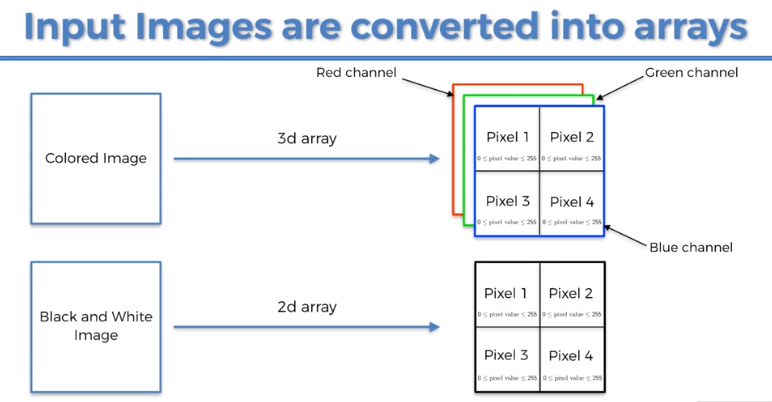

## Step2 :Max Pooling  

 Reducing the size of feature map. In pooling step size of the feature map has been divided by 2 if the feature map 
 is of 5X5 then after max pooling reduced pooled feature map would be of 3X3 size. for 4X4 feature map --> 2X2 pooled feature .

In [27]:
classifier.add(MaxPooling2D(pool_size=(2,2)))

## Setp 3 : FLATTENING



In [28]:
classifier.add(Flatten())

## Step4 : Full Connection

In [29]:
classifier.add(Dense(output_dim = 128 , activation  = 'relu'))
classifier.add(Dense(output_dim = 1 , activation = 'sigmoid'))

C:\Users\J554696\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="relu", units=128)`
  """Entry point for launching an IPython kernel.
C:\Users\J554696\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1)`
  


### Compiling the CNN

In [30]:
classifier.compile(optimizer='adam' , loss='binary_crossentropy', metrics = ['accuracy'])
# Adam optimizer for applying stochastic gradient descent
# loss = binary_crossentropy because we have binary outcome

## Part 2 : Fitting the CC to the layers

https://keras.io/preprocessing/image/

Generate batches of tensor image data with real-time data augmentation. The data will be looped over (in batches).
IMage Augmentation is the trick which allows us to enrich our dataset or training set without adding more images therefore it allows variation in the images and reduces the chances of overfitting.

We are going to use the code from keras library data.flow_from_directory because we have structured our data in proper directory structured manner.

With below code section we have everything we need to preprocess our images then augument them even fitting our CNN that we just built.

In [31]:
from keras.preprocessing.image import ImageDataGenerator
from IPython.display import display
from PIL import Image

In [32]:
## Image augmentation part where we apply several transformations.
train_datagen = ImageDataGenerator(
        rescale=1./255, ## Rescale all pixel values between 0&1(feature scaling part of data preprocessing)
        shear_range=0.2, ## to allow random transactions (geometrical transformation for the same purpose as augmenting)
        zoom_range=0.2, ## to apply random zooms
        horizontal_flip=True) ## to add some transformation in the images so that do not find the same images in different batches.


In [33]:
test_datagen = ImageDataGenerator(rescale=1./255) ## Preprocess the images of the test the test set.

In [34]:
training_set = train_datagen.flow_from_directory(
        'C:\\Users\\J554696\\Desktop\\Learning blocks\\Super DataScience\\Convolutional_Neural_Networks\\Convolutional_Neural_Networks\\dataset\\training_set',
        target_size=(64,64), ## dimension expected by CNN input shape
        batch_size=32, # number of images go for training in one batch
        class_mode='binary') ## it indicates dependent variable classes (Cat / Dog)

Found 8000 images belonging to 2 classes.


In [35]:
## Apply Image augmention  to the images of the training set.And exporting the images by 64X64 dimensions , creating the batches of 32 images.
test_set = test_datagen.flow_from_directory(
        'C:\\Users\\J554696\\Desktop\\Learning blocks\\Super DataScience\\Convolutional_Neural_Networks\\Convolutional_Neural_Networks\\dataset\\test_set',
        target_size=(64,64),
        batch_size=32,
        class_mode='binary')

Found 2000 images belonging to 2 classes.


Fit generator method will not only fit the model on training images but also test the model on test images from out test_set.

In [36]:
classifier.fit_generator(
        training_set,
        steps_per_epoch=8000, # number of images in our training set 
        epochs=1,
        validation_data=test_set, # dataset to evaluate the model
        validation_steps=2000) # number of images in test set

Epoch 1/1
8000/8000 [==============================] - 3926s 491ms/step - loss: 0.3183 - acc: 0.8528 - val_loss: 0.7338 - val_acc: 0.7877


## Improving the model performance
 
 There are 2 options to do this 
    1. By adding another the convolutional layer : You need to add below line right after the max pooling of the fisrt layer but before the flattening step. You are going the apply the convolution to the pooled featured map from the first layer.
    
    classifier.add(Convolution2D(32,3,3, activation='relu'))
    classifier.add(MaxPooling2D(pool_size=(2,2)))
   
   2. By adding the fully connected layer

### Making a new single pridction

In [37]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('C:\\Users\\J554696\\Desktop\\Learning blocks\\Super DataScience\\Convolutional_Neural_Networks\\Convolutional_Neural_Networks\\dataset\\single_prediction\\cat_or_dog_2.jpg',target_size =(64,64))


Let's add one more dimension to our image because the input image shape which we have added to CNN has 3 dimension (64,64,3)
From above code : classifier.add(Convolution2D(32,3,3,input_shape = (64,64,3) , activation='relu')). 3rd dimension because it's a coloured image.

That's why we use the function img_to_array that would allow to add a 3rd dimension to images and it becomes similar to input shape of CNN

In [38]:
test_image = image.img_to_array(test_image)

In [39]:
test_image.shape

(64, 64, 3)

Now predict method expect 4 dimension to predict the image. Now this 4th dimenssion corresponds to the batch. We are adding the dimension with numpy expand method.

In [40]:
test_image = np.expand_dims(test_image, axis = 0 ) ## adding new dimension @ 0th index
test_image.shape

(1, 64, 64, 3)

In [41]:
result = classifier.predict(test_image)

In [42]:
training_set.class_indices

{'cats': 0, 'dogs': 1}

In [43]:
result

array([[0.]], dtype=float32)

In [44]:
if result[0][0] == 1:
    print('prediction is Dog')
    
else:
    print('prediction is Cat')

prediction is Cat
